# Example 1

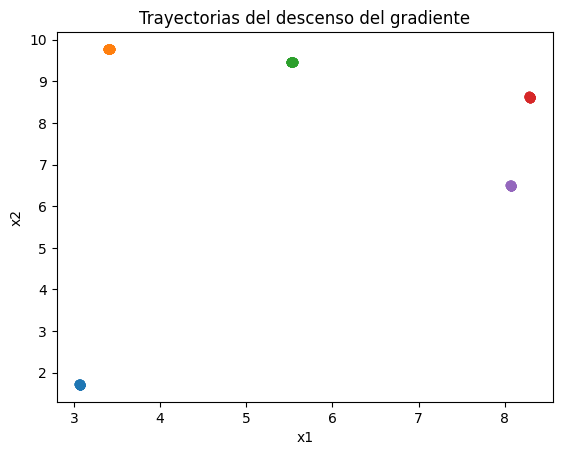

In [71]:
# 3pps
import matplotlib.pyplot as plt
import numpy as np

# Definición de la función


def function(input: np.ndarray) -> np.ndarray:
    assert input.shape[-1] == 2, "La entrada debe contener 2 elementos"
    return np.sin(input[:, 0]) * np.cos(input[:, 1]) + np.sin(0.5 * input[:, 0]) * np.cos(0.5 * input[:, 1])

# Cálculo del gradiente (derivadas parciales)


def gradiente(input: np.ndarray) -> np.ndarray:
    assert input.shape[-1] == 2, "La entrada debe contener 2 elementos"
    
    df_x1 = np.cos(input[:, 0]) * np.cos(input[:, 1]) + 0.5 * np.cos(0.5 * input[:, 0]) * np.cos(0.5 * input[:, 1])
    df_x2 = -np.sin(input[:, 0]) * np.sin(input[:, 1]) - 0.5 * np.sin(0.5 * input[:, 0]) * np.sin(0.5 * input[:, 1])

    return np.stack([df_x1, df_x2], axis=1)

# Algoritmo de descenso del gradiente


def descenso_gradiente(num_puntos: int = 10, num_iteraciones: int = 30, learning_rate: float = 1e-3):
    dim = 2
    X = np.random.rand(num_puntos, dim) * 10  # Inicialización en el dominio [0,10]
    trayectorias = [X.copy()]

    for _ in range(num_iteraciones):
        X = X - learning_rate * gradiente(input=X)
        trayectorias.append(X.copy())
        
    return np.array(trayectorias)


# Ejecución del descenso del gradiente
trayectoria = descenso_gradiente(num_puntos=5, num_iteraciones=30)

# Visualización de trayectorias en el espacio 2D
for i in range(trayectoria.shape[1]):
    plt.plot(trayectoria[:, i, 0], trayectoria[:, i, 1], marker="o")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Trayectorias del descenso del gradiente")
plt.show()

# Example 2

In [ ]:
# 3pps
import matplotlib.pyplot as plt
import torch

In [ ]:
tiempo = torch.arange(0, 20).float()
tiempo

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

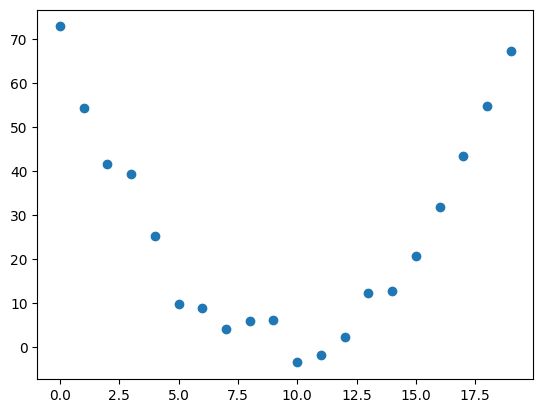

In [ ]:
velocidad = torch.randn(20) * 3 + 0.75 * (tiempo - 9.5) ** 2 + 1
plt.scatter(tiempo, velocidad)

In [ ]:
velocidad.shape, tiempo.shape

(torch.Size([20]), torch.Size([20]))

In [ ]:
def funcion(instante_tiempo: torch.Tensor, parametros: torch.Tensor) -> float:
    a, b, c = parametros
    return a * (instante_tiempo ** 2) + (b * instante_tiempo) + c

In [ ]:
def loss_function(predicted: torch.Tensor, real: torch.Tensor) -> torch.Tensor:
    return (real - predicted).square().mean()

In [ ]:
parametros = torch.randn(3).requires_grad_()
parametros

tensor([-0.7357,  0.2811,  0.4520], requires_grad=True)

In [ ]:
predicciones = funcion(instante_tiempo=tiempo, parametros=parametros)
predicciones

tensor([ 4.5200e-01, -2.6610e-03, -1.9288e+00, -5.3263e+00, -1.0195e+01,
        -1.6536e+01, -2.4348e+01, -3.3631e+01, -4.4385e+01, -5.6612e+01,
        -7.0309e+01, -8.5478e+01, -1.0212e+02, -1.2023e+02, -1.3981e+02,
        -1.6087e+02, -1.8339e+02, -2.0739e+02, -2.3286e+02, -2.5980e+02],
       grad_fn=<AddBackward0>)

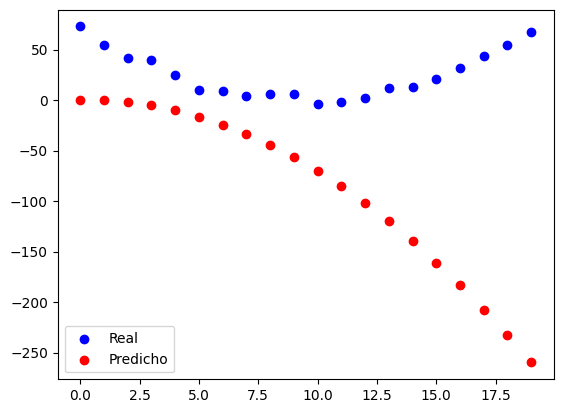

In [ ]:
def show_preds(tiempo, real, preds: torch.Tensor):
    plt.scatter(tiempo, real, color="blue", label="Real")
    plt.scatter(tiempo, preds.detach().cpu().numpy(), color="red", label="Predicho")
    plt.legend()
    plt.show()


show_preds(tiempo, velocidad, predicciones)

In [ ]:
perdida = loss_function(predicciones, velocidad)
perdida

tensor(20906.3555, grad_fn=<MeanBackward0>)

Aplicamos backward y comprobamos los gradientes

In [ ]:
perdida.backward()
parametros.grad

tensor([-47704.9453,  -3050.2773,   -226.2895])

Podemos utilizar un ratio de aprendizaje, actualizar el gradiente a partir de ese ratio y volver a colocar 0 en los gradientes para realizar una nueva evaluación

In [ ]:
lr = 1e-5
parametros.data = parametros.data - lr * parametros.grad.data
parametros.grad = None

In [ ]:
predicciones = funcion(instante_tiempo=tiempo, parametros=parametros)
predicciones

tensor([ 4.5426e-01,  5.0715e-01,  4.2707e-02, -9.3908e-01, -2.4382e+00,
        -4.4547e+00, -6.9884e+00, -1.0040e+01, -1.3608e+01, -1.7694e+01,
        -2.2297e+01, -2.7417e+01, -3.3055e+01, -3.9210e+01, -4.5883e+01,
        -5.3073e+01, -6.0780e+01, -6.9004e+01, -7.7746e+01, -8.7005e+01],
       grad_fn=<AddBackward0>)

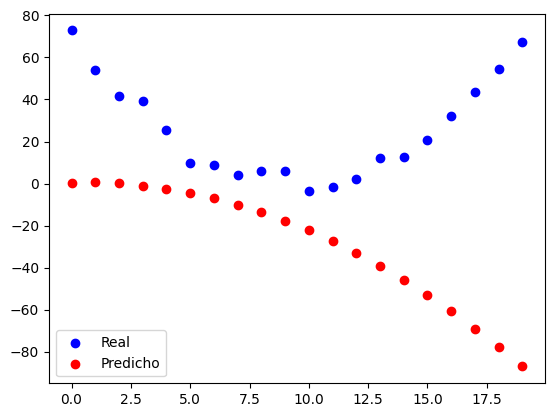

In [ ]:
show_preds(tiempo, velocidad, predicciones)

In [ ]:
def apply_step_training(tiempo, parametros_aprendibles, datos_a_predecir, lr=1e-5):
    predicciones = funcion(instante_tiempo=tiempo, parametros=parametros_aprendibles)
    perdida = loss_function(predicted=predicciones, real=datos_a_predecir)
    perdida.backward()

    # Hacerlo así es más seguro para actualizar los parámetros aprendibles
    with torch.no_grad():
        parametros_aprendibles -= lr * parametros_aprendibles.grad
    
    # Otra forma de resetear los gradientes
    parametros_aprendibles.grad.zero_()

    show_preds(tiempo, datos_a_predecir, predicciones)
    return predicciones, parametros_aprendibles, perdida

In [ ]:
# 3pps
from tqdm import tqdm

  0%|          | 0/20 [00:00<?, ?it/s]

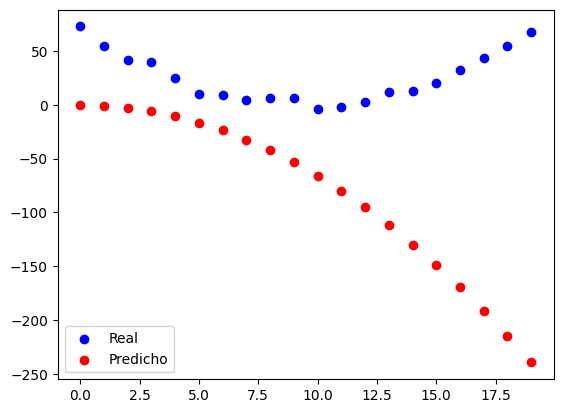

  5%|▌         | 1/20 [00:00<00:03,  5.12it/s]

Epoch 1, perdida: 18470.908203125


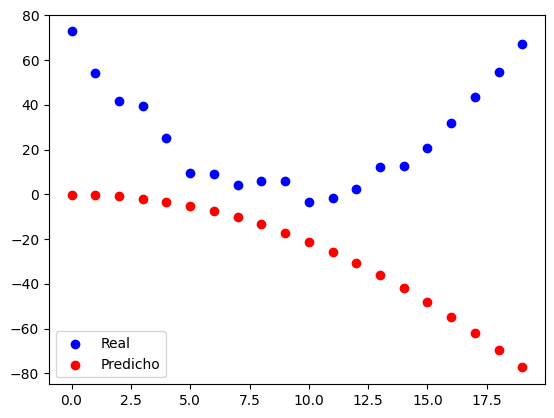

 10%|█         | 2/20 [00:00<00:03,  5.29it/s]

Epoch 2, perdida: 4058.17822265625


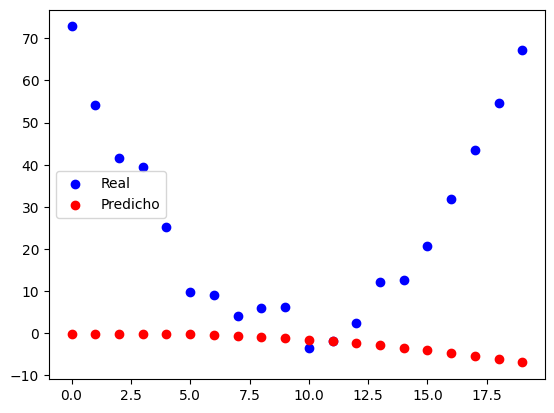

 15%|█▌        | 3/20 [00:00<00:03,  5.32it/s]

Epoch 3, perdida: 1330.846923828125


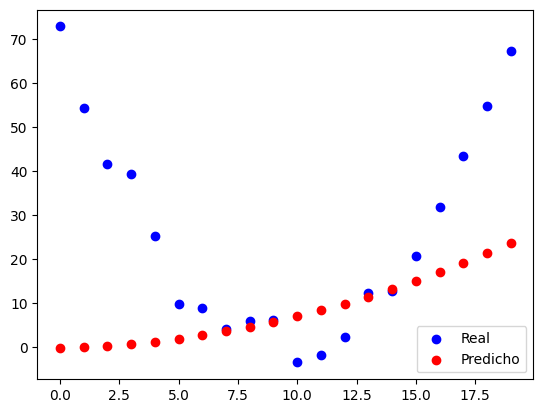

 20%|██        | 4/20 [00:00<00:02,  5.37it/s]

Epoch 4, perdida: 814.7498168945312


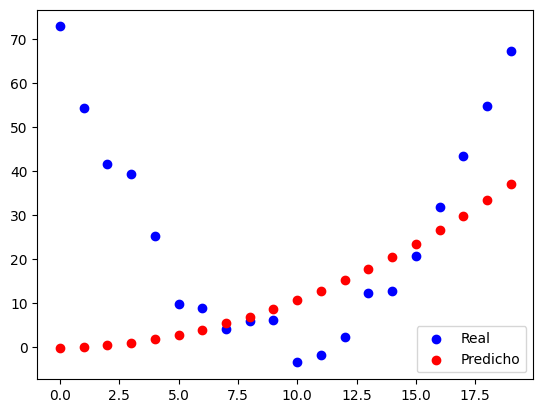

 25%|██▌       | 5/20 [00:00<00:03,  4.80it/s]

Epoch 5, perdida: 717.0855102539062


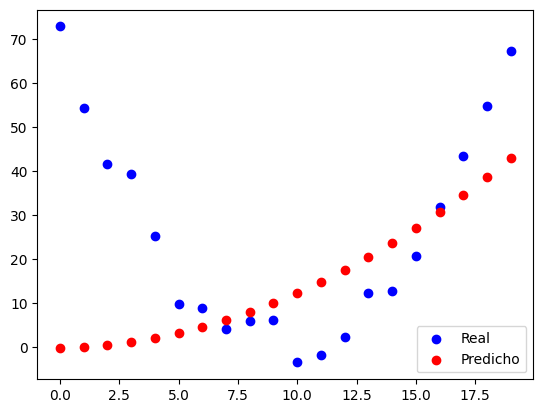

 30%|███       | 6/20 [00:01<00:02,  4.99it/s]

Epoch 6, perdida: 698.6016845703125


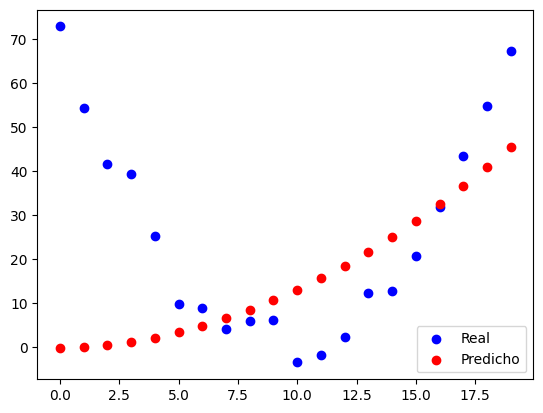

 35%|███▌      | 7/20 [00:01<00:02,  5.01it/s]

Epoch 7, perdida: 695.1009521484375


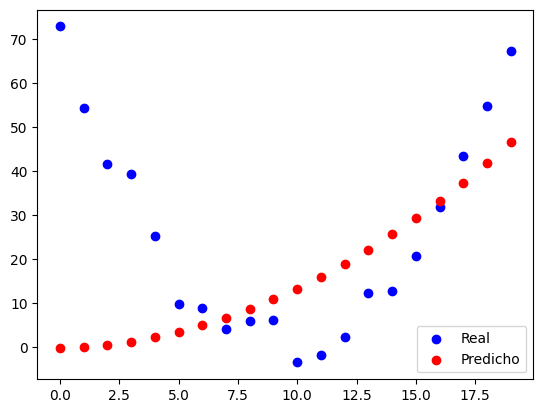

 40%|████      | 8/20 [00:01<00:02,  5.03it/s]

Epoch 8, perdida: 694.4356689453125


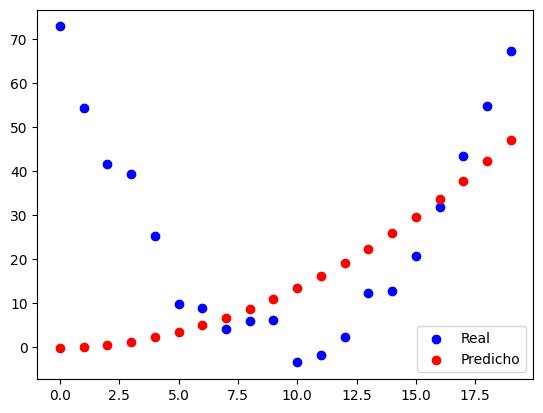

 45%|████▌     | 9/20 [00:01<00:02,  5.07it/s]

Epoch 9, perdida: 694.3067626953125


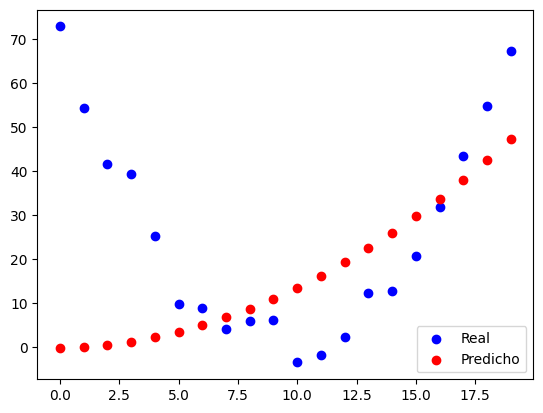

 50%|█████     | 10/20 [00:01<00:01,  5.08it/s]

Epoch 10, perdida: 694.2796020507812


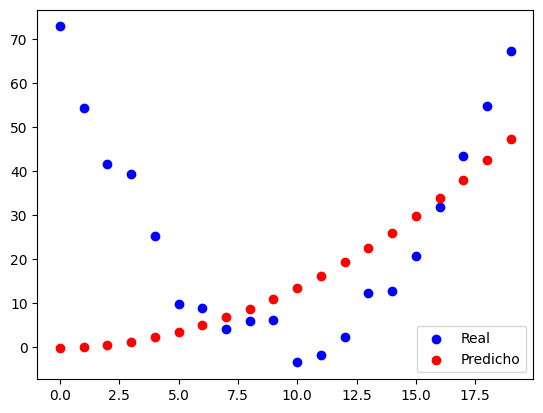

 55%|█████▌    | 11/20 [00:02<00:01,  5.10it/s]

Epoch 11, perdida: 694.271484375


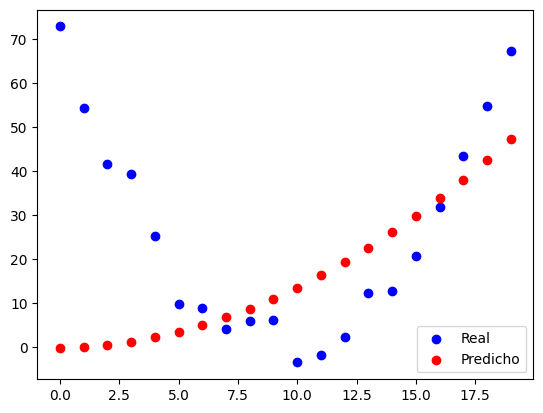

 60%|██████    | 12/20 [00:02<00:01,  4.25it/s]

Epoch 12, perdida: 694.26708984375


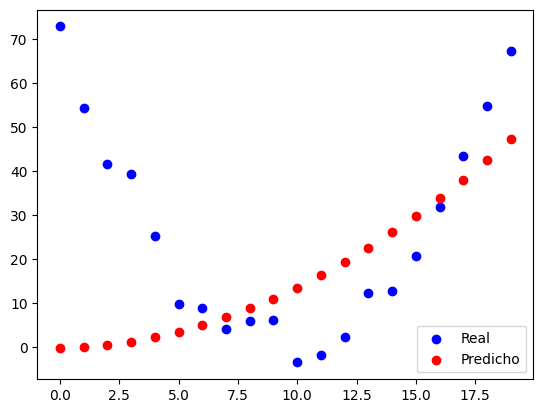

 65%|██████▌   | 13/20 [00:02<00:01,  4.50it/s]

Epoch 13, perdida: 694.2633056640625


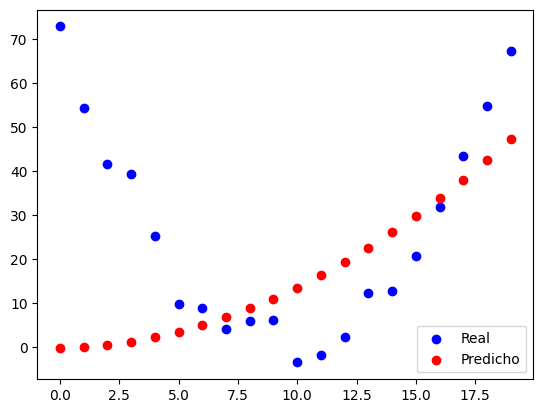

 70%|███████   | 14/20 [00:02<00:01,  4.25it/s]

Epoch 14, perdida: 694.2596435546875


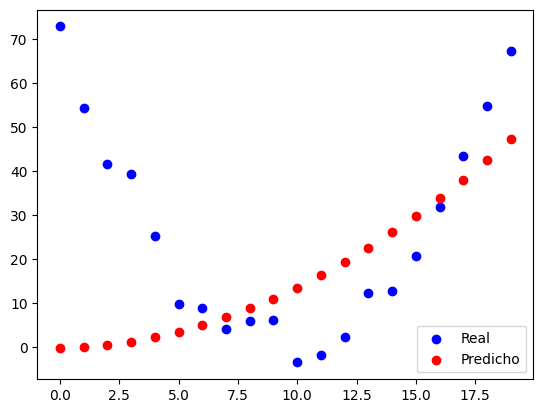

 75%|███████▌  | 15/20 [00:03<00:01,  4.55it/s]

Epoch 15, perdida: 694.256103515625


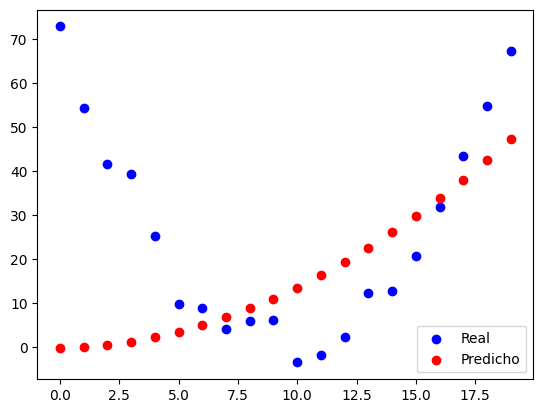

 80%|████████  | 16/20 [00:03<00:00,  4.69it/s]

Epoch 16, perdida: 694.2525634765625


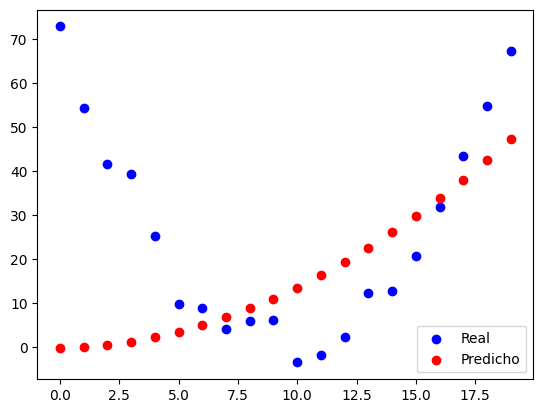

 85%|████████▌ | 17/20 [00:03<00:00,  4.81it/s]

Epoch 17, perdida: 694.2490234375


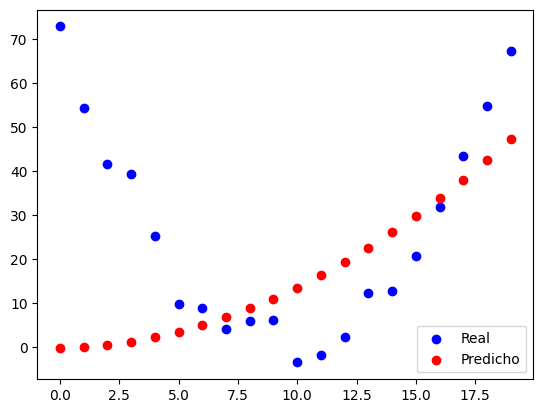

 90%|█████████ | 18/20 [00:03<00:00,  5.01it/s]

Epoch 18, perdida: 694.245361328125


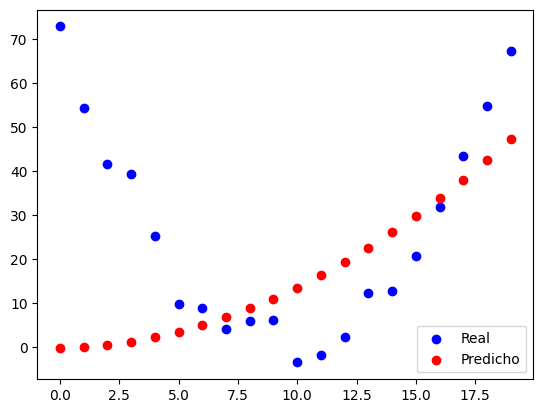

 95%|█████████▌| 19/20 [00:03<00:00,  4.94it/s]

Epoch 19, perdida: 694.2418212890625


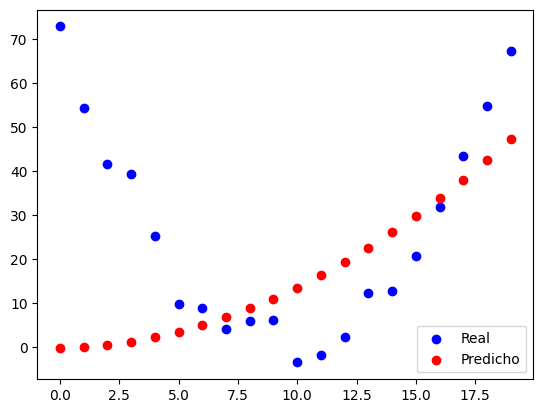

100%|██████████| 20/20 [00:04<00:00,  4.88it/s]

Epoch 20, perdida: 694.2382202148438


In [ ]:
num_epochs = 20
parametros_aprendibles = torch.randn(3, requires_grad=True)

for epoch in tqdm(range(num_epochs)):
    predicciones, parametros_aprendibles, perdida = apply_step_training(
        tiempo=tiempo, 
        parametros_aprendibles=parametros_aprendibles, 
        datos_a_predecir=velocidad
    )
    print(f"Epoch {epoch+1}, perdida: {perdida}")

In [ ]:
def linear_layer(tensor_entrada: torch.Tensor) -> torch.Tensor:

    # (tensor_entrada) -> (B, N)
    # peso -> (B, N, 1)
    # (N) 
    return tensor_entrada @ w + b


class CapaLineal:

    def __init__(self, shape_entrada: int) -> None:

        self.w = torch.randn()